In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

# 함수 모음집

In [ ]:
# 피봇 코드 + 합계 만들기
def making_pivot(df):
   pivot_df = df.pivot_table(index='Attraction',columns='Category_Map',values='Selected_People',aggfunc='sum',fill_value=0)
   pivot_df['Sum'] = pivot_df['가격 및 가치'] + pivot_df['서비스'] + pivot_df['시설 및 분위기'] + pivot_df['음식의 속성']
   return pivot_df

In [ ]:
# iqr 로 3개의 그룹 나누기
def making_iqr_group(df,column) :
    q1 = np.percentile(df[column].values,25)
    q3 = np.percentile(food[column].values,75)
    iqr = (q3 -q1) *1.5
    low = q1 - iqr
    high = q3 + iqr

    upper  = df[df[column] > high]
    condition = (df[column] <= high ) & (df[column] >= low)
    avg = df[condition]
    lower = df[df[column] < low]
    return upper,avg,lower

In [ ]:
# 히스토그램 그리기
def making_hist(df):
    titles = df.select_dtypes(include='float64').columns
    plt.figure(figsize=(10,10))
    sns.pairplot(df.select_dtypes(include='float64'))
    plt.show()

In [ ]:
# 정규성검정 - 샤피로
def shapiro_test(df):
    for column in df:
        test = stats.shapiro(df[column])
        if test[1] < 0.05 :
            print(f"{column} - p-value: {round(test[1],2)}")
            print('정규분포를 따르지 않습니다')

In [ ]:
# 유사도 추천 시스템
def cosine_similarity_func(df,top_n,seed):
    lst = []
    np.random.seed(seed)
    choice = np.random.choice(df['Attraction'])
    print(choice)
    index = int(df[df['Attraction'] == choice].index.item())

    print(index)
    cosine_sim = cosine_similarity(df.iloc[:,1:],df.iloc[:,1:])
    similarities = cosine_sim[index]

    similarities[index] = -np.inf
    print(similarities)
    print(choice, '와 가장 비슷한 음식점 추천은 ')
    most = list(np.argsort(similarities)[-5:])
    print(most)
    print(df.iloc[most])

# 0. 데이터 불러오기

In [ ]:
path = './raw_csv/dataset_food_final.csv'
df = pd.read_csv(path,index_col=0)
df

,Attraction,Category,type,Category_Map,Good_Point,Selected_People,Participants
0,채그로,음식,cafe,시설 및 분위기,뷰가 좋아요,146.0,201
1,채그로,음식,cafe,시설 및 분위기,집중하기 좋아요,62.0,201
2,채그로,음식,cafe,시설 및 분위기,읽을만한 책이 많아요,61.0,201
3,채그로,음식,cafe,시설 및 분위기,인테리어가 멋져요,60.0,201
4,채그로,음식,cafe,음식의 속성,커피가 맛있어요,39.0,201
...,...,...,...,...,...,...,...
10528,h450,음식,west,시설 및 분위기,아늑해요,2.0,260
10529,h450,음식,west,가격 및 가치,메뉴 구성이 알차요,2.0,260
10530,h450,음식,west,음식의 속성,건강한 맛이에요,2.0,260
10531,h450,음식,west,음식의 속성,음료가 맛있어요,1.0,260


In [ ]:
food = making_pivot(df)
food

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
1940금문,6.0,43.0,79.0,210.0,338.0
63뷔페 파빌리온,2372.0,1974.0,7101.0,6137.0,17584.0
BK볏짚 우대갈비 장안동본점,62.0,285.0,551.0,887.0,1785.0
RSG 성수,0.0,2.0,17.0,13.0,32.0
WANGTHAI,31.0,173.0,342.0,567.0,1113.0
...,...,...,...,...,...
황금정원,172.0,254.0,1520.0,2009.0,3955.0
황생가칼국수,323.0,921.0,1891.0,5523.0,8658.0
황토추어탕,224.0,154.0,273.0,750.0,1401.0


# 1. Box Plot

<Axes: >

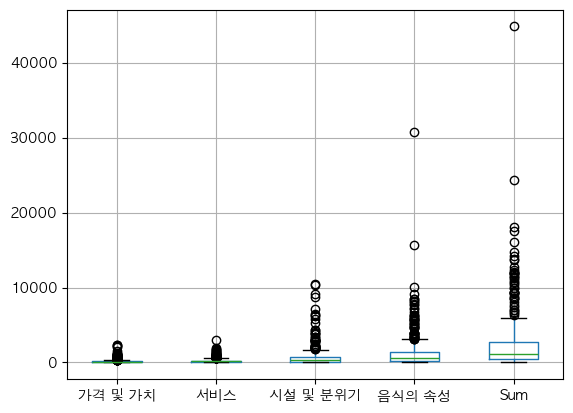

In [ ]:
food.boxplot()

데이터들의 전체 수치가 맞지 않는것을 확인   
일단 sum 기준으로 iqr upper/avg / lower 로 자른다

In [ ]:
np.percentile(food['Sum'].values,25)

523.5

# 1-1. Sum 기준

In [ ]:
upper,avg,lower = making_iqr_group(food,'Sum')

In [ ]:
len(upper), len(avg),len(lower)

(42, 408, 0)

# 1-1-1. 상위 클래스

In [ ]:
# 상위 클래스
upper.describe()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,729.785714,965.619048,3624.904762,6506.738095,11827.047619
std,612.621060,505.574821,2574.972013,4517.836230,6298.950129
min,131.000000,393.000000,565.000000,2183.000000,6294.000000
25%,272.000000,592.250000,1765.750000,4606.750000,8715.000000
50%,512.000000,850.500000,2897.000000,5667.000000,10633.000000
75%,995.000000,1098.250000,4347.250000,7246.250000,12251.000000
max,2372.000000,2992.000000,10410.000000,30767.000000,44821.000000


여전이 평균대비 편차가 너무 크다

<Axes: >

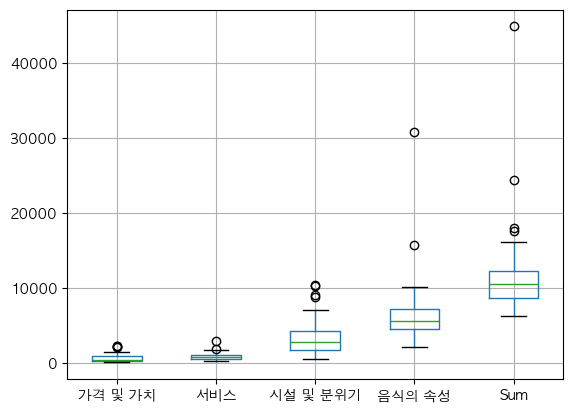

In [ ]:
upper.boxplot()

격차는 줄어들었으니 몇몇의 이상치(?) 존재

<Figure size 1000x1000 with 0 Axes>

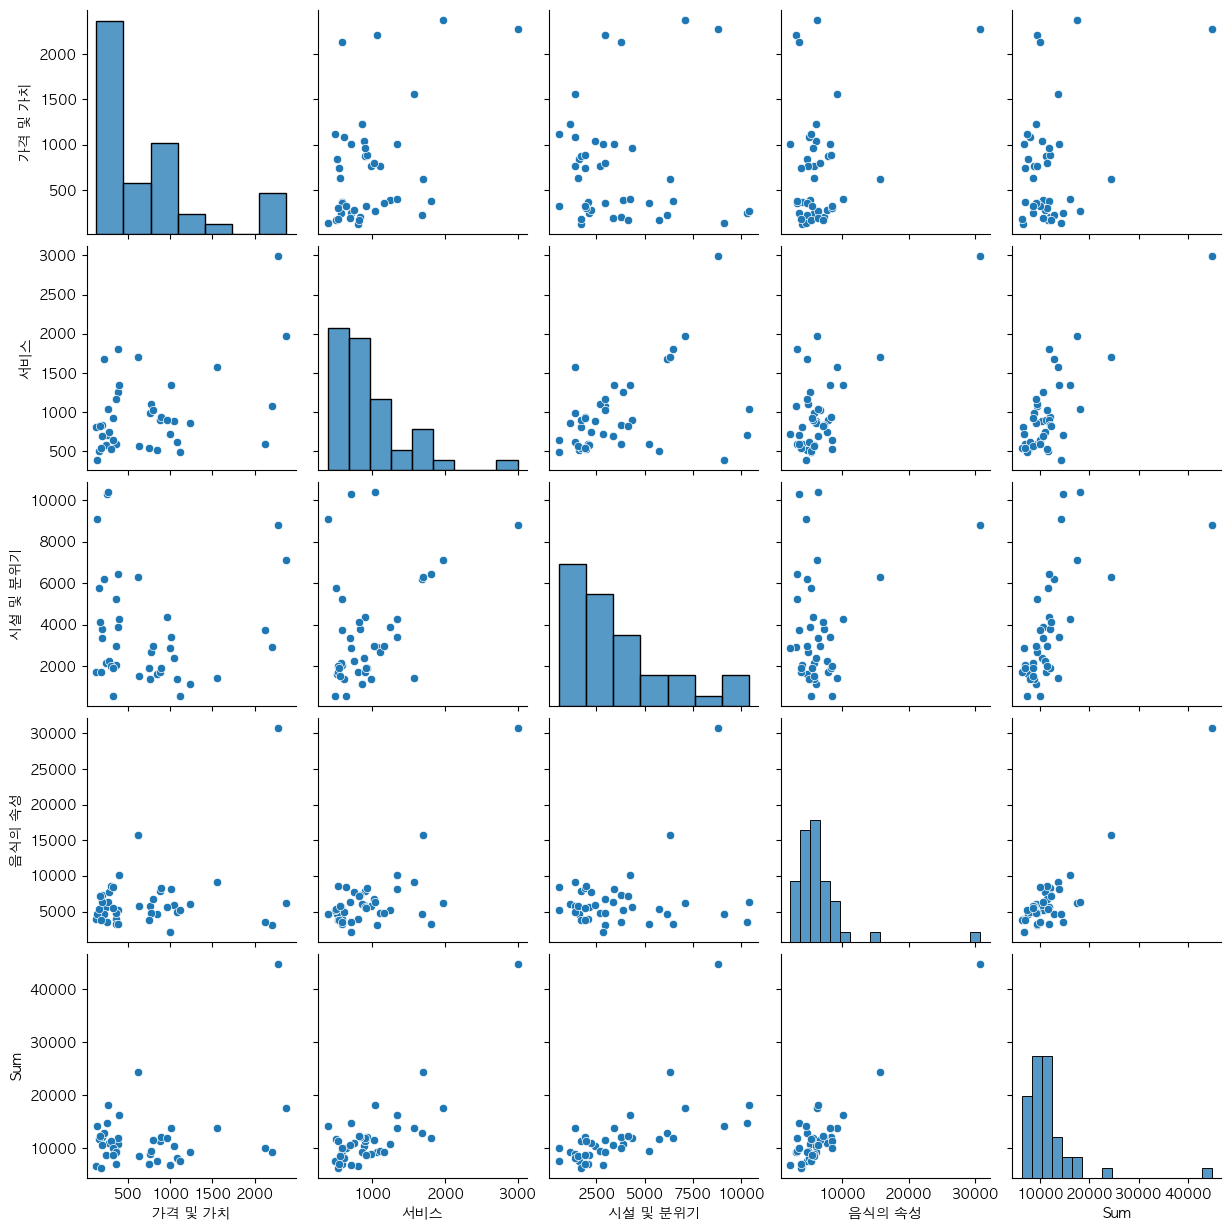

In [ ]:
making_hist(upper)

## 상위 클래스 로그화

In [ ]:
upper_log = np.log1p(upper)

In [ ]:
upper_log.describe()
# 어느정도 정상수치 안으로는 들어왔다

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,6.271214,6.769259,7.962849,8.655076,9.297475
std,0.821517,0.443721,0.704315,0.458631,0.368045
min,4.882802,5.976351,6.338594,7.688913,8.747511
25%,5.609156,6.385609,7.476084,8.435493,9.072852
50%,6.216301,6.746937,7.971707,8.642589,9.271801
75%,6.903594,7.002308,8.377476,8.888358,9.413421
max,7.771910,8.004032,9.250618,10.334230,10.710454


<Axes: >

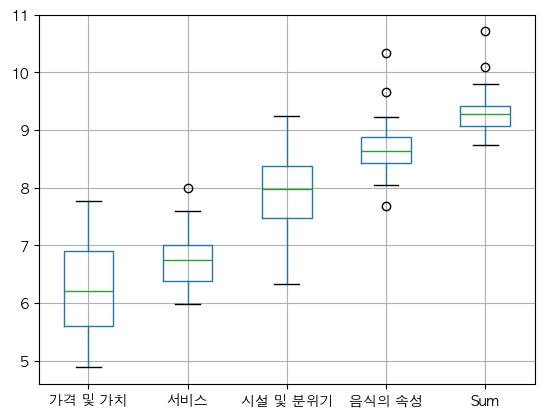

In [ ]:
upper_log.boxplot()

<Figure size 1000x1000 with 0 Axes>

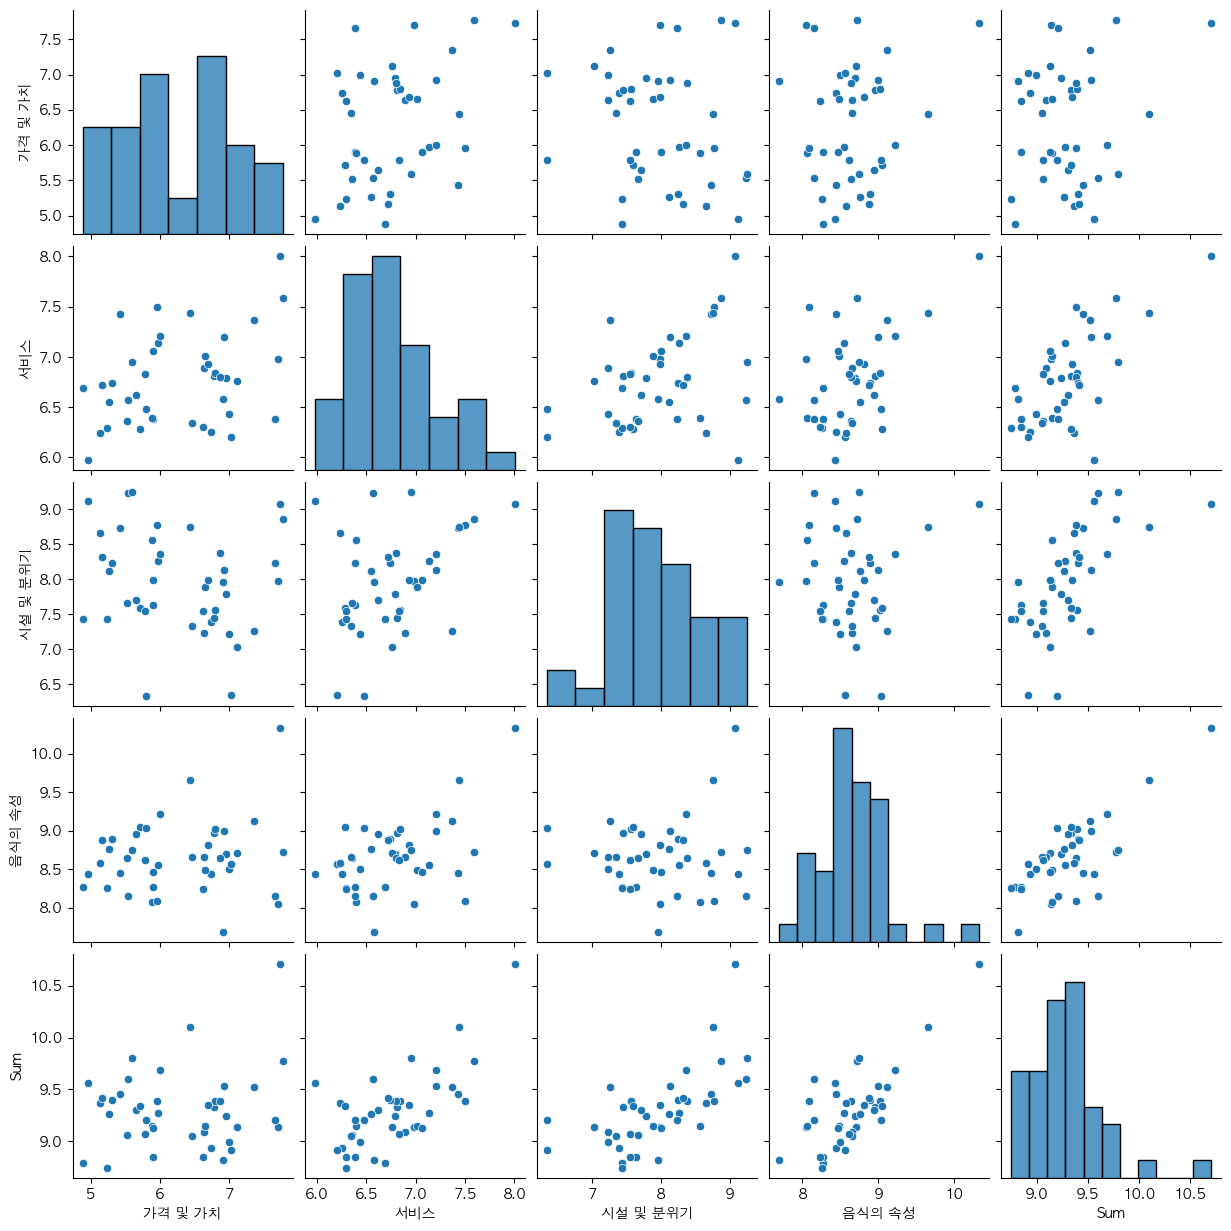

In [ ]:
making_hist(upper_log)

## 정규성 검정

H0 : 정규분포를 따른다

In [ ]:
shapiro_test(upper_log)

음식의 속성 - p-value: 0.01
정규분포를 따르지 않습니다
Sum - p-value: 0.0
정규분포를 따르지 않습니다


몇몇의 속성이 정규성을 따르지 않아서 정규화 진행
내가 지금 데이터를 정규화 하는 이유는 뭘까?  
콘텐츠 기반 알고리즘을 사용하는데 정규화가 필요한가?  
코사인 유사도 거리를 측정할때는 벡터값을 사용하기 때문에 필요하진 않지만..  
추가적인 분석을 할수도 있으니까?  
그렇다면 추가적인 분석을 뭘 하려고 하는건데?  

## 정규화

문제 : 한번 자른다고 정규화 해결 안됨   
정규화를 그냥 한번 하는걸로 만족?

In [ ]:
scaler = StandardScaler()
upper_scaled = scaler.fit_transform(upper_log)
upper_scaled = pd.DataFrame(upper_scaled, columns=upper_log.columns,index=upper_log.index)
upper_scaled.head(3)

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
63뷔페 파빌리온,1.848880,1.868274,1.300918,0.148251,1.312646
강강술래신림본동점,-0.372692,0.830362,0.429579,-0.230927,-0.057931
그리츠 레스토랑,1.758417,0.482990,0.029589,-1.352831,-0.433577


In [ ]:
upper_scaled.to_csv('./raw_csv/test/정규화.csv')

In [ ]:
shapiro_test(upper_scaled)
# 여전히 정규성을 따르지 않는데...
# 그냥 우리 데이터가 가진 특성이라고 생각하고 넘어가자
# 나중에 필요하면 정규성 검정 바꾸기

음식의 속성 - p-value: 0.01
정규분포를 따르지 않습니다
Sum - p-value: 0.0
정규분포를 따르지 않습니다


In [ ]:
upper_scaled = upper_scaled.iloc[:, :-1]
upper_scaled

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성
Attraction,,,,
63뷔페 파빌리온,1.848880,1.868274,1.300918,0.148251
강강술래신림본동점,-0.372692,0.830362,0.429579,-0.230927
그리츠 레스토랑,1.758417,0.482990,0.029589,-1.352831
꽃밥에피다,-1.710544,-0.176036,-0.755365,-0.844125
남산골산채집,-0.450735,-0.879896,-0.472777,-0.840746
대치동중앙해장,-0.918789,-0.934487,-0.426936,-0.022884
동적불고기깡통구이 쌍문 본점,1.332878,1.359287,-1.011286,1.032231
또순이네집,0.576734,-1.175689,-0.820283,-0.476333
런던베이글뮤지엄,-0.338511,0.998751,0.570147,1.250826


In [ ]:
cosine_sim = cosine_similarity(upper_scaled)
cosine_sim

array([[ 1.        ,  0.45737934,  0.59857779, ..., -0.43816305,
         0.14689048, -0.65545873],
       [ 0.45737934,  1.        ,  0.03020501, ...,  0.3287524 ,
         0.89458714,  0.10682509],
       [ 0.59857779,  0.03020501,  1.        , ..., -0.88429652,
         0.03296234, -0.45947249],
       ...,
       [-0.43816305,  0.3287524 , -0.88429652, ...,  1.        ,
         0.26849801,  0.34141779],
       [ 0.14689048,  0.89458714,  0.03296234, ...,  0.26849801,
         1.        ,  0.47214604],
       [-0.65545873,  0.10682509, -0.45947249, ...,  0.34141779,
         0.47214604,  1.        ]])

## 임의의 사용자가 장소를 고르게 한다

이 부분을 스트림릿에서 인기 음식점 클릭 -> 리스트로 드래그해서 보여주게하고 -> 선택

In [ ]:
# # 유사도 추천 시스템 (1개만 )
# def cosine_similarity_func(df):
#     np.random.seed(42)
#     choice = np.random.choice(df['Attraction'])
#     index = df[df['Attraction'] == choice].index
#     index =np.argmax(cosine_sim[index])
#     similarities = cosine_sim[index]
#     similarities[index] = -np.inf
#     most_similar_index = np.argmax(similarities)
#     most_similar_index
#     print(np.argmaxdf[df.index == most_similar_index]['Attraction'])


In [ ]:
# np.random.seed(42)
# upper_temp = upper.reset_index().rename(columns={'Category_Map': 'index'})
# choice = np.random.choice(upper_temp['Attraction'])
# choice

'토속촌삼계탕'

In [ ]:
# index = upper_temp[upper_temp['Attraction'] == choice].index
# index =np.argmax(cosine_sim[index])
# index

38

In [ ]:
# cosine_sim[index]
# # 사용자가 초이스 한 장소와 다른 장소의 유사도

array([-0.72340709,  0.05764189, -0.87121317,  0.65441499,  0.37556289,
        0.7988521 , -0.70962299, -0.18139917,  0.13310354, -0.90682301,
       -0.34283847, -0.661669  , -0.57647014, -0.50847759, -0.45872583,
       -0.5023469 , -0.61417433,  0.46359037, -0.26861963, -0.8565866 ,
       -0.63146276,  0.36286821,  0.91684027,  0.22131668, -0.11932631,
        0.77624157,  0.87303954,  0.63164018,  0.00925178,  0.76667838,
        0.65552388, -0.14892938, -0.74304212,  0.20519951,  0.44444107,
       -0.59286624, -0.38862837, -0.07011509,  1.        ,  0.92858322,
        0.1207358 ,  0.44649317])

In [ ]:
# # 예시로 한개만 뽑아보자
# similarities = cosine_sim[index]
# similarities[index] = -np.inf
# most_similar_index = np.argmax(similarities)
# most_similar_index

39

In [ ]:
# # 왜 유사하다고 나왔을까?
# upper.iloc[38:40]

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
토속촌삼계탕,193.0,696.0,3344.0,6351.0,10584.0
패션5,173.0,827.0,4130.0,7169.0,12299.0


In [ ]:
# upper_scaled.iloc[38:40]

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성
Attraction,,,,
토속촌삼계탕,-1.236149,-0.507460,0.218964,0.223880
패션5,-1.370196,-0.114611,0.522253,0.491207


여기서 문제! 유사하지 않다!  
왜냐하면 카테고리별 추천이 아니라 카테고리 없이 나눈거라  
그냥 오로지 네이버 리뷰를 기준으로 비슷한 것을 추천해주기에  
삼계탕집과 가장 유사한 장소가 갑자기 카페가 나올수도 있게 된 것...   
이것을 보안하기 위해선... 어쩔수없이 카테고리별로 진행해야할것 같다   

방법1. 상위클래스만 뗀다 -> 카테고리로 나눈다 -> 유사도거리 -> 추천장소   
방법2. 카테고리로 나눈다 -> 상위클래스만 뗀다 -> 유사도거리 -> 추천장소  

문제점 : 추천해줄만한 장소들의 선택지가 많지 않다  
보안법 1 : 그냥 쌩까고 몇개만 추천해준다(니네 다 갈거 아니잖아?)  (근데 카페만 해도 8개/ 근데 사실 뭐 문제는 없긴 하거든요...?)   
(근데 적어도 카페나 다른 것들도 한식만큼의 양이 있다면... 그래도 추천해주는 느낌이 드니까... )  
보안법 2 : 죽음의 크롤링을 더 한다  

## 방법1. 상위클래스-> 카테고리

In [ ]:
korean_list = list(set(df[df['type'] == 'korean']['Attraction']))
upper_korean_df = upper[upper.index.isin(korean_list)]
upper_korean_df

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
강강술래신림본동점,390.0,1252.0,3872.0,5168.0,10682.0
꽃밥에피다,131.0,805.0,1697.0,3914.0,6547.0
남산골산채집,366.0,591.0,2066.0,3920.0,6943.0
대치동중앙해장,250.0,577.0,2133.0,5679.0,8639.0
동적불고기깡통구이 쌍문 본점,1560.0,1579.0,1420.0,9161.0,13720.0
또순이네집,844.0,519.0,1622.0,4624.0,7609.0
마복림할머니집,1044.0,890.0,2408.0,5983.0,10325.0
명동칼국수 본점,2270.0,2992.0,8792.0,30767.0,44821.0
모녀마약김밥,1233.0,860.0,1131.0,6040.0,9264.0


In [ ]:
korean_list = list(set(df[df['type'] == 'korean']['Attraction']))
upper_korean = upper_scaled[upper_scaled.index.isin(korean_list)]
upper_korean = upper_korean.reset_index()
upper_korean

Category_Map,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성
0,강강술래신림본동점,-0.372692,0.830362,0.429579,-0.230927
1,꽃밥에피다,-1.710544,-0.176036,-0.755365,-0.844125
2,남산골산채집,-0.450735,-0.879896,-0.472777,-0.840746
3,대치동중앙해장,-0.918789,-0.934487,-0.426936,-0.022884
4,동적불고기깡통구이 쌍문 본점,1.332878,1.359287,-1.011286,1.032231
5,또순이네집,0.576734,-1.175689,-0.820283,-0.476333
6,마복림할머니집,0.838458,0.052657,-0.252748,0.092176
7,명동칼국수 본점,1.794752,2.816497,1.607839,3.705611
8,모녀마약김밥,1.043273,-0.025467,-1.338031,0.113097
9,무교동 북어국집,0.452586,0.281433,-1.048162,0.006448


In [ ]:
cosine_similarity_func(upper_korean,5,42)

마복림할머니집
6
[-0.43761811 -0.73240889 -0.31373295 -0.58697855  0.73036999  0.41017966
        -inf  0.34353403  0.81456625  0.63608539  0.74442044  0.66094772
  0.73047451  0.51358751  0.57126793  0.55501686 -0.8773354  -0.56522321
  0.31214015 -0.50978224 -0.28699018  0.2634176   0.73829504 -0.90682301
 -0.46614154]
마복림할머니집 와 가장 비슷한 음식점 추천은 
[4, 12, 22, 10, 8]
Category_Map       Attraction   가격 및 가치       서비스  시설 및 분위기    음식의 속성
4             동적불고기깡통구이 쌍문 본점  1.332878  1.359287 -1.011286  1.032231
12                     삼청동수제비  0.643423  0.157721 -0.581038  0.804317
22                     청와옥 본점  0.512389  0.374455  0.039845  0.344550
10                         미진  0.625335  0.088219 -0.732695  0.681302
8                      모녀마약김밥  1.043273 -0.025467 -1.338031  0.113097
<class 'pandas.core.frame.DataFrame'>


https://deepdata.tistory.com/197

1 : 완전 유사  
0 : 무관  
-1 : 완전 반대

In [ ]:
upper_korean.iloc[[4,6, 12, 22, 10, 8]]

Category_Map,Attraction,가격 및 가치,서비스,시설 및 분위기,음식의 속성
4,동적불고기깡통구이 쌍문 본점,1.332878,1.359287,-1.011286,1.032231
6,마복림할머니집,0.838458,0.052657,-0.252748,0.092176
12,삼청동수제비,0.643423,0.157721,-0.581038,0.804317
22,청와옥 본점,0.512389,0.374455,0.039845,0.344550
10,미진,0.625335,0.088219,-0.732695,0.681302
8,모녀마약김밥,1.043273,-0.025467,-1.338031,0.113097


In [ ]:
upper_korean_df.iloc[[4,6, 12, 22, 10, 8]]

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
동적불고기깡통구이 쌍문 본점,1560.0,1579.0,1420.0,9161.0,13720.0
마복림할머니집,1044.0,890.0,2408.0,5983.0,10325.0
삼청동수제비,891.0,932.0,1916.0,8262.0,12001.0
청와옥 본점,801.0,1025.0,2952.0,6708.0,11486.0
미진,878.0,904.0,1724.0,7814.0,11320.0
모녀마약김밥,1233.0,860.0,1131.0,6040.0,9264.0


In [ ]:
int(upper_korean_df1[upper_korean_df1['Attraction'] == '마복림할머니집'].iloc[:,1].values)

1044

In [ ]:
def best_option(df,name):
    lst = []
    for i in range(4):
        lst.append(int(df[df['Attraction'] == name ].iloc[:,i+1].values) )
    print( max(lst), '가 가장 큰값이며' , max(lst).index , '를 가장 중요하게 생각합니다' )

In [ ]:
def best_option(df, name):
    lst = []
    # 'Attraction'이 name인 행 찾기
    target_row = df[df['Attraction'] == name]

    # 해당 행의 2번째부터 5번째 컬럼까지의 값을 리스트에 추가
    for i in range(1, 5):
        # 각 열의 값은 실수 형태로 가정하며, 정수로 변환하기 전에 .item()을 사용하여 배열에서 스칼라 값으로 변환
        lst.append(int(target_row.iloc[0, i].item()))

    # 리스트에서 최대값 찾기
    max_value = max(lst)

    # 최대값의 인덱스 찾기
    max_index = lst.index(max_value)

    # 최대값과 해당 인덱스 출력
    print(f"{max_value}가 가장 큰 값이며, {max_index + 1}번째 항목을 가장 중요하게 생각합니다")


In [ ]:
best_option(upper_korean_df1,'마복림할머니집')


5983가 가장 큰 값이며, 4번째 항목을 가장 중요하게 생각합니다


랜덤으로 나온 값중에 마복림 할머니집은 음식속성이 가장 높았고 유사도를 측정해서 나온 결과들이 모두 음식의 속성이 높은 것을 발견했다   
여기서 추천해주기전에 마복림할머니집을 선택한 경우 또한 어떤 속성들이 높은지 알려주는 것도 좋을것 같다   
ex) 마복립 할머니집 선택 : 마복림할머니집의 경우 음식의 속성과 시설의 분위기를 중요하게 생각합니다  
그 특성을 중요하게 생각하는 유사한 음식점을 추천드리겠습니다

In [ ]:

# upper_korean_df1 = upper_korean_df.reset_index().iloc[:,:-1]
# cosine_similarity_func(upper_korean_df1,5,42)


In [ ]:
# upper_korean_df.iloc[[6,17, 24, 21, 22, 5]]

# 1-1-2. 중간 클래스

In [ ]:
avg.describe()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
count,408.000000,408.000000,408.000000,408.000000,408.000000
mean,87.921569,159.198529,445.181373,804.583333,1496.884804
std,125.258921,150.579462,494.585585,794.029244,1369.048967
min,0.000000,2.000000,6.000000,10.000000,22.000000
25%,20.000000,56.750000,112.250000,237.750000,482.500000
50%,42.500000,118.000000,272.500000,552.500000,1044.000000
75%,106.250000,213.500000,618.500000,1006.000000,2067.750000
max,1101.000000,1233.000000,3180.000000,3969.000000,5996.000000


<Axes: >

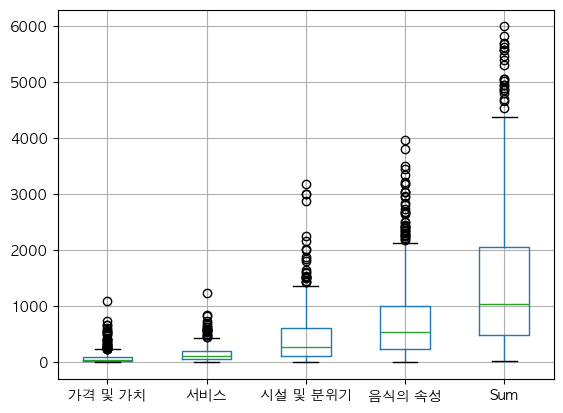

In [ ]:
avg.boxplot()

<Figure size 1000x1000 with 0 Axes>

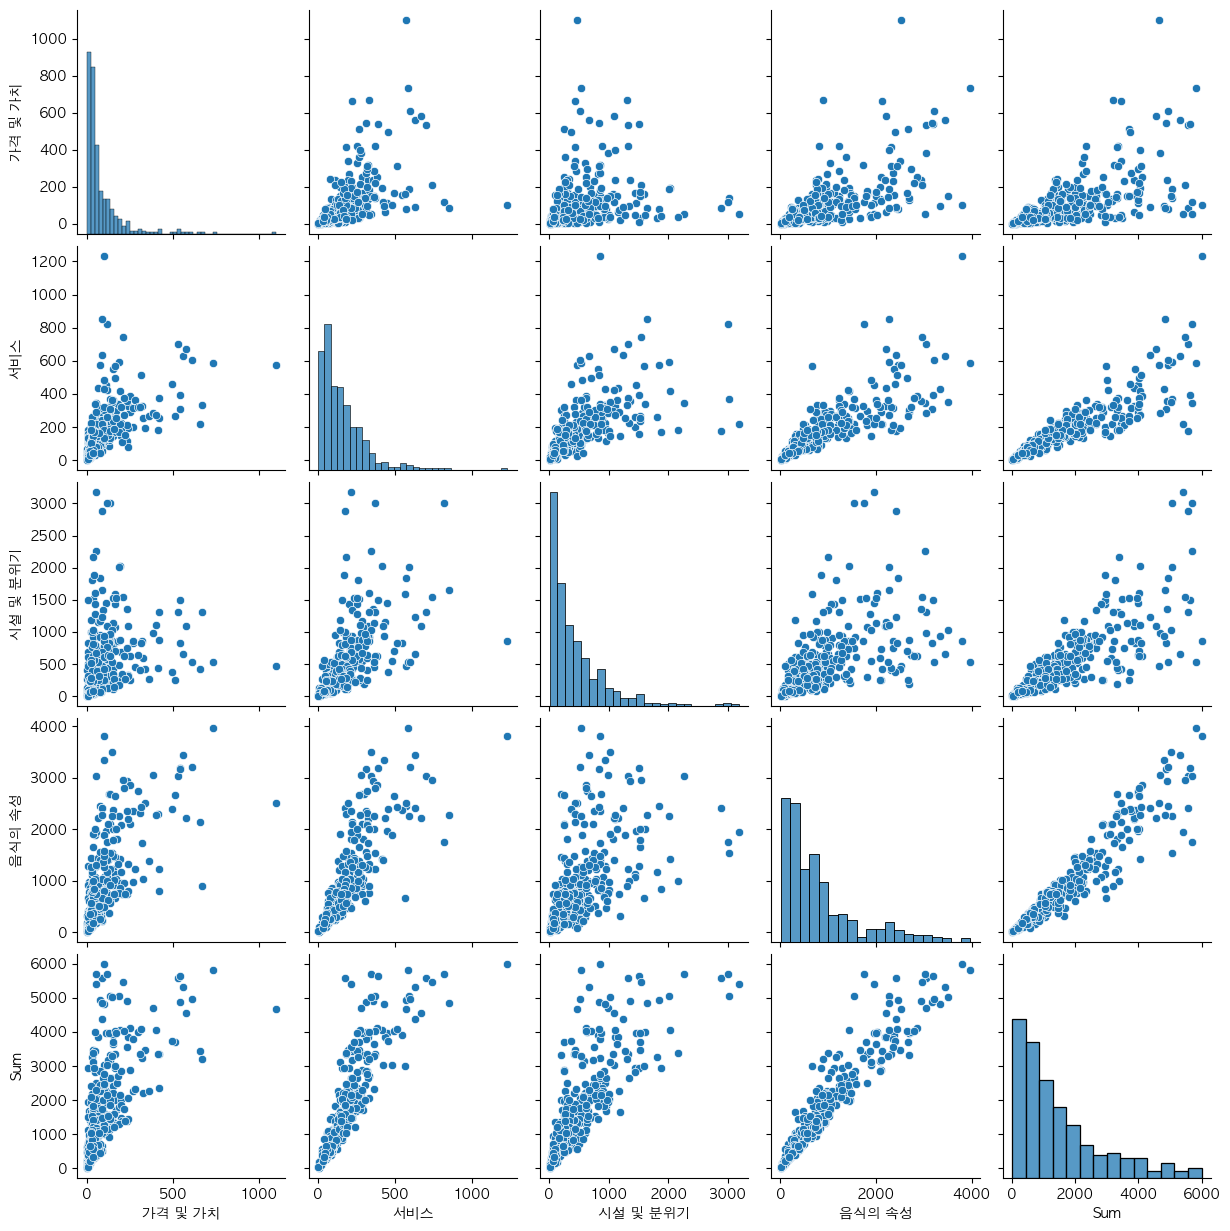

In [ ]:
making_hist(avg)

In [ ]:
shapiro_test(avg)

가격 및 가치 - p-value: 0.0
정규분포를 따르지 않습니다
서비스 - p-value: 0.0
정규분포를 따르지 않습니다
시설 및 분위기 - p-value: 0.0
정규분포를 따르지 않습니다
음식의 속성 - p-value: 0.0
정규분포를 따르지 않습니다
Sum - p-value: 0.0
정규분포를 따르지 않습니다


In [ ]:
avg_log = np.log1p(avg)
avg_log

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
Attraction,,,,,
1940금문,1.945910,3.784190,4.382027,5.351858,5.826000
BK볏짚 우대갈비 장안동본점,4.143135,5.655992,6.313548,6.788972,7.487734
RSG 성수,0.000000,1.098612,2.890372,2.639057,3.496508
WANGTHAI,3.465736,5.159055,5.837730,6.342121,7.015712
h450,4.143135,4.488636,5.707110,5.986452,6.742881
...,...,...,...,...,...
화니 신세계 강남점,3.988984,5.673323,6.502790,7.168580,7.743703
황금정원,5.153292,5.541264,7.327123,7.605890,8.282989
황토추어탕,5.416100,5.043425,5.613128,6.621406,7.245655


In [ ]:
avg_log.describe()

Category_Map,가격 및 가치,서비스,시설 및 분위기,음식의 속성,Sum
count,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.798739,4.649748,5.516685,6.170677,6.834973
std,1.228326,1.019552,1.181623,1.135983,1.092300
min,0.000000,1.098612,1.945910,2.397895,3.135494
25%,3.044522,4.056095,4.729531,5.475415,6.181050
50%,3.772695,4.779123,5.611300,6.316252,6.951770
75%,4.675154,5.368302,6.428912,6.914725,7.634700
max,7.004882,7.118016,8.064951,8.286521,8.699015


<Axes: >

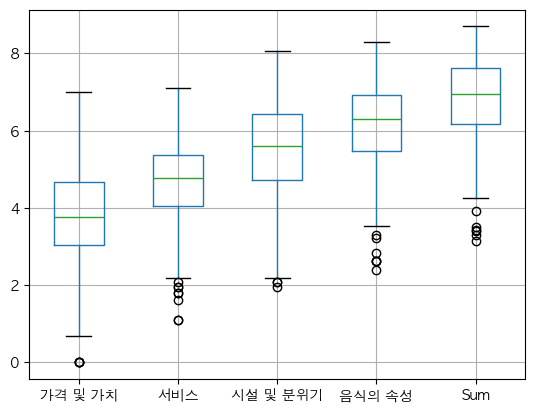

In [ ]:
avg_log.boxplot()

<Figure size 1000x1000 with 0 Axes>

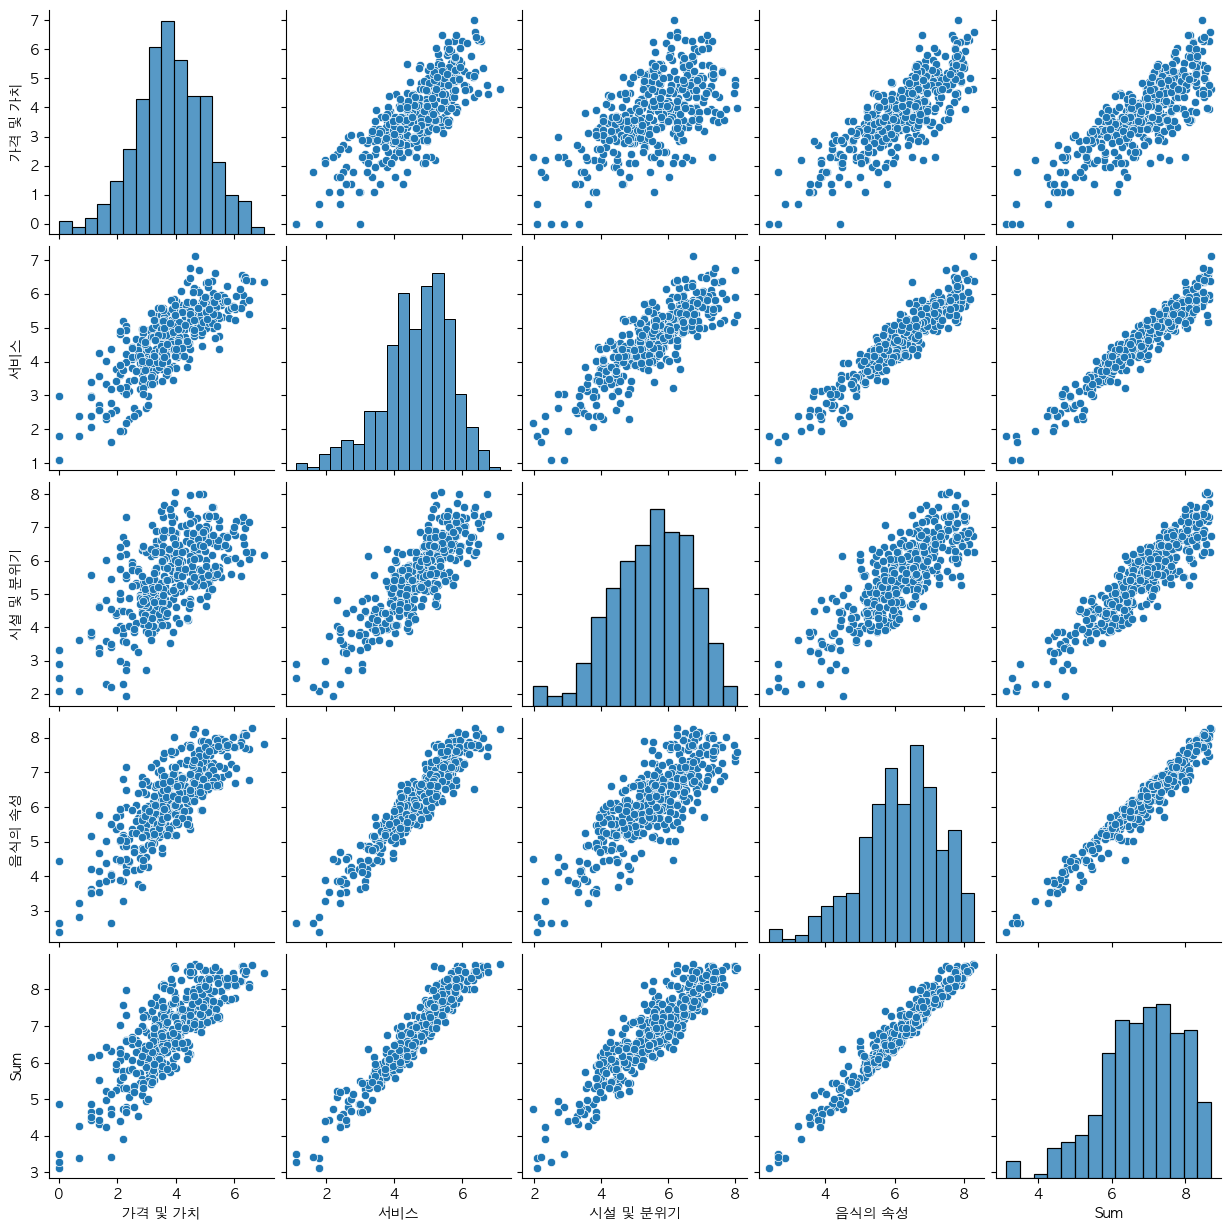

In [ ]:
making_hist(avg_log)

In [ ]:
shapiro_test(avg_log)

가격 및 가치 - p-value: 0.04
정규분포를 따르지 않습니다
서비스 - p-value: 0.0
정규분포를 따르지 않습니다
시설 및 분위기 - p-value: 0.0
정규분포를 따르지 않습니다
음식의 속성 - p-value: 0.0
정규분포를 따르지 않습니다
Sum - p-value: 0.0
정규분포를 따르지 않습니다


# 1-1-3. 하위 클래스

없음  
1차결론  
Sum 기준으로 자를시 2개로 나뉘고 편차역시 해결되지 않는다  
이상태에서 로그화를 진행해야 할것 같다

# 2. 군집분석(로그화전)

# 3.군집분석(로그화후)